In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download burhanbilenn/duygu-analizi-icin-urun-yorumlari

duygu-analizi-icin-urun-yorumlari.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip /content/duygu-analizi-icin-urun-yorumlari.zip

Archive:  /content/duygu-analizi-icin-urun-yorumlari.zip
  inflating: magaza_yorumlari_duygu_analizi.csv  


In [13]:
# Import utility libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
# Import libraries for text manipulation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# Import modules for evaluation purposes
# Import libraries for predcton
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud

In [14]:
df = pd.read_csv('/content/magaza_yorumlari_duygu_analizi.csv', encoding='utf-16')
df_wo_Tarafsiz = df[df['Durum'] != 'Tarafsız']
df_wo_Tarafsiz.loc[:,'encoded_Durum'] = LabelEncoder().fit_transform(df_wo_Tarafsiz.loc[:,'Durum'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [17]:
df_wo_Tarafsiz = df_wo_Tarafsiz[:8000]
sentences = df_wo_Tarafsiz['Görüş'].dropna().values
len(sentences)

7998

In [20]:
data=np.concatenate((sentences[:1000], sentences[1999:3000], sentences[3999:]))
len(data)

6000

In [24]:
labels = df_wo_Tarafsiz['encoded_Durum'][df_wo_Tarafsiz['Görüş'].dropna().index].values
len(labels)

7998

In [25]:
labels = np.concatenate((labels[:1000], labels[1999:3000], labels[3999:]))
len(labels)

6000

In [26]:
X_train = data[:5000]
y_train = labels[:5000]
X_test = data[5000:]
y_test = labels[5000:]

In [29]:
tfidf = TfidfVectorizer(decode_error='ignore', lowercase = True, min_df=2) # lowercase???
# Numericalize the train dataset
train = tfidf.fit_transform(X_train.astype('U'))
# Numericalize the test dataset
test = tfidf.transform(X_test.astype('U'))

In [30]:
from sklearn.svm import SVC
svm = SVC()

In [31]:
svm.fit(train, y_train)

SVC()

In [32]:
pred = svm.predict(test)

In [33]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.9059500959692898

In [34]:
from sklearn.manifold import TSNE

In [42]:
type(train)

scipy.sparse.csr.csr_matrix

In [44]:
np.concatenate((train.toarray(),test.toarray()),axis=0)

(6000, 6945)

In [45]:
tsne = TSNE(2)
tsne_result = tsne.fit_transform(np.concatenate((train.toarray(),test.toarray()),axis=0))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [47]:
import seaborn as sns

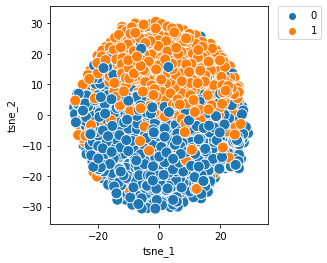

In [48]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': np.concatenate((y_train,y_test))})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)